# Importing Data

This lesson introduces you to importing tabular data with pandas. It also illustrates how you can interact with relational databases via SQL, along with how to import common non-tabular data such as JSON and pickle files. This comes prior to the tutorial on usage of pandas, but you will not need to understand pandas to follow along here.

## Learning Objectives

1. Import tabular data with Pandas.
2. Assess DataFrame attributes and methods.
3. Import alternative data files such as SQL tables, JSON, and pickle files.

## General Model for Importing Data

### Memory and Size
* Unless you're using a distributed computing framework such as Spark, Python stores its data in your computer's memory. This makes it relatively accessible but can cause size limitations depending on the data you're using.
* If memory is a concern, you can always use Dask, Spark, or another distributed framework, though those solutions are somewhat more cumbersome and we will not cover them here.
* Python memory is session-specific, so quitting Python (e.g. shutting down Jupyterlab) removes the data from memory. If you need to persist data beyond the lifetime of a single session there are methods for doing so.

### General Framework
A general way to conceptualize data import into and use within Python:

* Data sits in on the computer/server - this is frequently called "disk"
* Python code can be used to copy a data file from disk to the Python session's memory
* Python data then sits within Python's memory ready to be used by other Python code

Here is a visualization of this process:

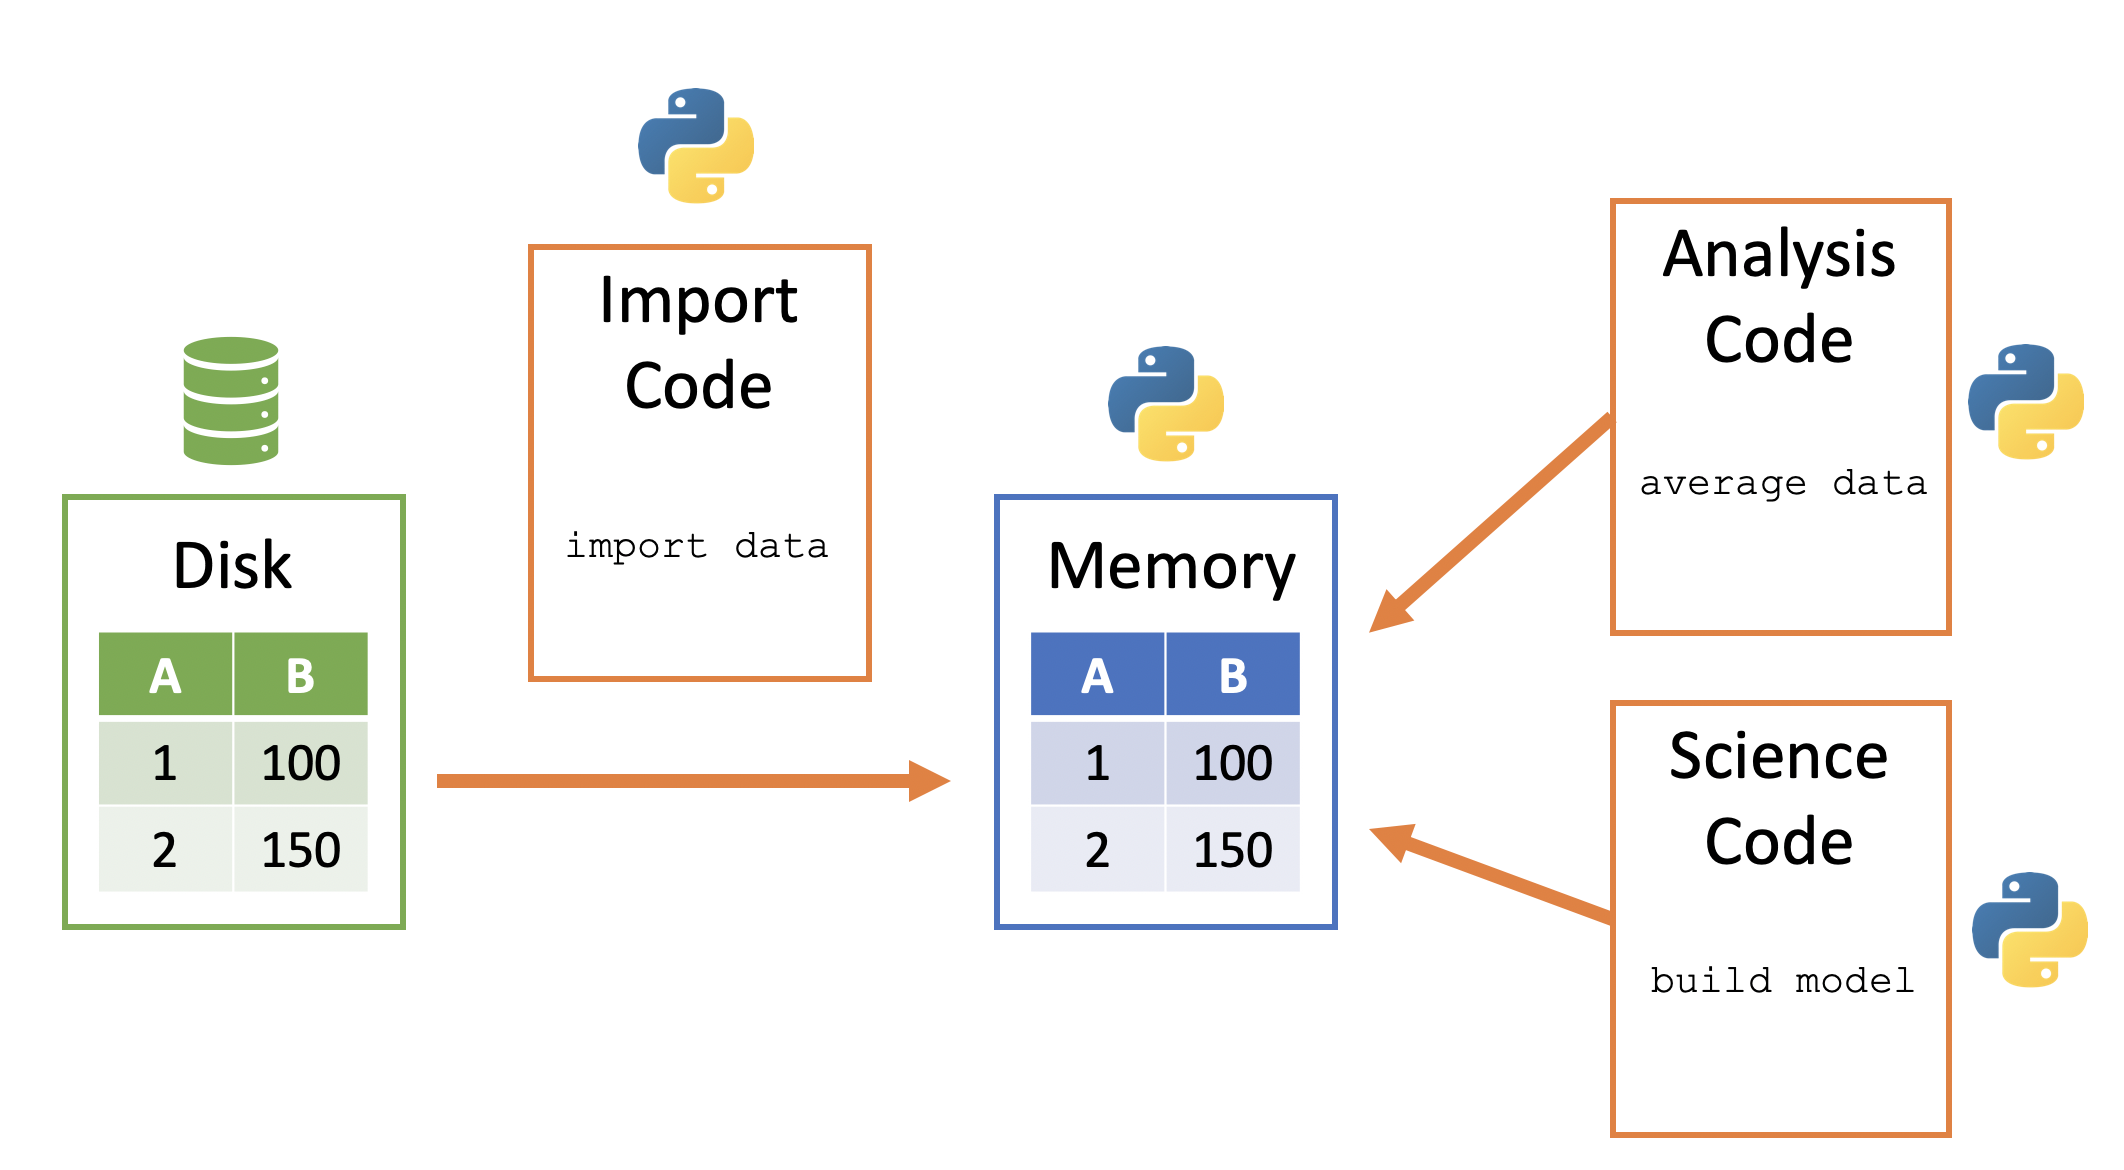

## Importing Tabular Data

Tabular (i.e. relational) data remains the predominant format for data storage, though it's not suitable for all types of data (for example, images or audio). Storing tabular data as a delimited text file has limitations -- it's slow to read, doesn't contain metadata, and can take up a significant amount of storage -- but it's very common.

### Importing Tabular Data with Base Python

When the data you're accessing is stored as a delimited text file, you can use builtin modules to import data into a Python object.

First we import the `csv` module, which handles parsing of CSV files:

In [50]:
import csv

The `csv` module can be used in the following way:

1. Open a file for reading with the `open()` function
2. Create an iterator over the lines of the file using the `readlines()` method of the opened file handle
3. Pass this iterator to the `csv.reader()` function, which parses each row of the CSV file
4. Parse the header raw, if applicable
5. Parse each line of the file into the relevant Python object

This is easier done than said. Note that in the following I make use of the `with` statement; think of this as a way of ensuring that the file handle is closed without having to close it manually. This is an example of a "context manager", which you can read more about [here](https://book.pythontips.com/en/latest/context_managers.html).

In [60]:
with open("../data/planes.csv") as f:   # Open the file and assign its handle to f
    reader = csv.reader(f.readlines())  # returns an iterator over the rows of the tabular data
    header = next(reader)               # the `next()` function grabs the next row and advances the iterator
    
    data = [line for line in reader]    # parse each line of the iterator into a list of lists
                                        # f is implicitly closed when the block ends

The result is a list of lists, where the nth element of the list is a list of items (in order) from the nth row in the dataset:

In [52]:
data[3]

['N104UW',
 '1999.0',
 'Fixed wing multi engine',
 'AIRBUS INDUSTRIE',
 'A320-214',
 '2',
 '182',
 '',
 'Turbo-fan']

If instead we wanted a column-based approach, so that we could grab whole columns by name, we can do so with a dictionary comprehension:

In [56]:
data_cols = {header_item: [row[i] for row in data] for i, header_item in enumerate(header)}

data_cols["tailnum"][:5]

['N10156', 'N102UW', 'N103US', 'N104UW', 'N10575']

This is a somewhat cumbersome method both of parsing and of dealing with the resulting dataset, however. We'll cover an easier way.

### Importing Tabular Data with Pandas

Pandas is preferred because it imports the data directly into what's known as a *data frame*, the data structure of choice for tabular data in Python. We'll cover this in more detail later.

Pandas is usually imported in the following way:

In [49]:
import pandas as pd

The `read_csv()` function is used to import a tabular data file, in this case a CSV, into a data frame:

In [5]:
planes = pd.read_csv('../data/planes.csv')

Note that although the name of the function refers to CSV, this works with other kinds of delimtiers. If we wanted to be more specific about the delimiter, we can do that:

In [7]:
planes = pd.read_csv("../data/planes.csv", delimiter=",")

You can also be specific about which row contains the header (0 means no header):

In [9]:
planes = pd.read_csv("../data/planes.csv", header=1)

Full documentation can be pulled up by running the method name followed by a question mark:

In [10]:
pd.read_csv?

Signature:
pd.read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    *,
    sep: 'str | None | lib.NoDefault' = <no_default>,
    delimiter: 'str | None | lib.NoDefault' = None,
    header: "int | Sequence[int] | None | Literal['infer']" = 'infer',
    names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>,
    index_col: 'IndexLabel | Literal[False] | None' = None,
    usecols=None,
    squeeze: 'bool | None' = None,
    prefix: 'str | lib.NoDefault' = <no_default>,
    mangle_dupe_cols: 'bool' = True,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters=None,
    true_values=None,
    false_values=None,
    skipinitialspace: 'bool' = False,
    skiprows=None,
    skipfooter: 'int' = 0,
    nrows: 'int | None' = None,
    na_values=None,
    keep_default_na: 'bool' = True,
    na_filter: 'bool' = True,
    verbose: 'bool' = False,
    skip_blank_lines: 'bool' = True,
    parse_dates=None,
    infer

### Your Turn

Load the `..data/flights.csv` file into Python using pandas. Using the documentation for `pd.read_csv()`, run it twice, once for each possible value of the `engine` argument. Note any differences.

### Importing Data from SQL Tables

Organizations continue to use relational databases along with SQL to interact with these data assets. Python has many tools to interact with these databases and you can even query SQL database tables using panda's read_sql command.

In a real-world scenario you could use a Python library specific to your database vendor, or else a library that abstracts away those details (such as SQLAlchemy). For demonstration purposes we'll use sqlite, a database that's bundled with Python.

To connect to a sqlite database, simply call its `connect()` function while specifying the database file's location on disk:

In [22]:
import sqlite3

con = sqlite3.connect("../data/chinook.db")

You could use that connection object to read from a table manually, but it's easier to use the `pd.read_sql()` function from pandas to read the "tracks" table directly as a data frame:

In [25]:
pd.read_sql("select * from tracks", con=con)

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99
...,...,...,...,...,...,...,...,...,...
3498,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,343,2,24,None,286741,4718950,0.99
3499,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",344,2,24,Franz Schubert,139200,2283131,0.99
3500,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",345,2,24,Claudio Monteverdi,66639,1189062,0.99
3501,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",346,2,24,Wolfgang Amadeus Mozart,221331,3665114,0.99


If you are familiar with SQL then you can even pass any conformant query directly in the pd.read_sql() call. For example, the following SQL query:

1. SELECTS the name, composer, and milliseconds columns,
2. FROM the tracks table,
3. WHERE observations in the milliseconds column are greater than 200,000 and WHERE observations in the composer column are not missing (NULL)

In [28]:
sql_query = (
    "select name, composer, milliseconds "
    "from tracks "
    "where milliseconds > 200000 and composer is not null"
)

long_tracks = pd.read_sql(sql_query, con=con)
long_tracks.head()

,Name,Composer,Milliseconds
0,For Those About To Rock (We Salute You),"Angus Young, Malcolm Young, Brian Johnson",343719
1,Fast As a Shark,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619
2,Restless and Wild,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051
3,Princess of the Dawn,Deaffy & R.A. Smith-Diesel,375418
4,Put The Finger On You,"Angus Young, Malcolm Young, Brian Johnson",205662


### Reading Other Data Formats with Pandas

The pandas package is filled with methods for reading various data formats, including:

1. `pd.read_parquet()` for parquet files
2. `pd.read_excel()` for excel files
3. `pd.read_xml()` for XML files
4. ... and many others ...

I encourage you to look through the package documentation [here](https://pandas.pydata.org/docs/search.html?q=read_).

## Many Other File Types

There are many other file types that you may encounter, most of which we can import into Python one way or another. Most tabular (2-dimensional data sets) can be imported directly with pandas. For example, [this page](https://pandas.pydata.org/docs/search.html?q=read_) shows a list of the many pandas.read_xxx() functions that allow you to read various data file types.

Other types of data should be treated on a case-by-case basis.

### JSON Files

A common example is a JSON file. These are non-tabular structured data files that are popular as a data interchange format due to their human readability and flexibility. Here is an example JSON file:

```json
{
    "planeId": "1xc2345g",
    "manufacturerDetails": {
        "manufacturer": "Airbus",
        "model": "A330",
        "year": 1999
    },
    "airlineDetails": {
        "currentAirline": "Southwest",
        "previousAirlines": {
            "1st": "Delta"
        },
        "lastPurchased": 2013
    },
    "numberOfFlights": 4654
}
```

```{note}
Does this JSON data structure remind you of a Python data structure? The JSON file bears a striking resemblance to the Python `dict`ionary structure due to the key-value pairings.
```

JSON Files can be imported using the json library (from the Standard library) paired with the `with` statement and the `open()` function.

In [30]:
import json

with open('../data/json_example.json', 'r') as f:
    imported_json = json.load(f)

We can then verify that our imported object is a dict:

In [31]:
type(imported_json)

dict

And we can view the data:

In [57]:
imported_json

{'planeId': '1xc2345g',
 'manufacturerDetails': {'manufacturer': 'Airbus',
  'model': 'A330',
  'year': 1999},
 'airlineDetails': {'currentAirline': 'Southwest',
  'previousAirlines': {'1st': 'Delta'},
  'lastPurchased': 2013},
 'numberOfFlights': 4654}

Note that you can also read JSON with pandas, though it may not work as you'd expect with nested data:

In [58]:
pd.read_json("../data/json_example.json")

,planeId,manufacturerDetails,airlineDetails,numberOfFlights
manufacturer,1xc2345g,Airbus,NaN,4654
model,1xc2345g,A330,NaN,4654
year,1xc2345g,1999,NaN,4654
currentAirline,1xc2345g,NaN,Southwest,4654
previousAirlines,1xc2345g,NaN,{'1st': 'Delta'},4654
lastPurchased,1xc2345g,NaN,2013,4654


### Pickle Files

So far, we've seen that tabular data files can be imported and represented as DataFrames and JSON files can be imported and represented as dicts, but what about other, more complex data?

Python's native data files are known as Pickle files:

* Pickle files generally have the .pickle extension
* Pickle files are great for saving native Python data that can't easily be represented by other file types such as:
  * pre-processed data,
  * models,
  * most (but not all) Python objects

Similar to JSON files, pickle files can be imported using the pickle library paired with the with statement and the open() function:

In [34]:
import pickle

with open('../data/pickle_example.pickle', 'rb') as f:
    imported_pickle = pickle.load(f)

We can view this file and see it's the same data as the JSON:

In [61]:
imported_pickle

{'planeId': '1xc2345g',
 'manufacturerDetails': {'manufacturer': 'Airbus',
  'model': 'A330',
  'year': 1999},
 'airlineDetails': {'currentAirline': 'Southwest',
  'previousAirlines': {'1st': 'Delta'},
  'lastPurchased': 2013},
 'numberOfFlights': 4654}

### Others

If you have to import data in some relatively standardized format, there is almost always an off the shelf library you can use.

1. ini: the builtin [configparser module](https://docs.python.org/3/library/configparser.html)
2. yaml: the [yaml package](https://pypi.org/project/PyYAML/)
3. toml: the [toml package](https://pypi.org/project/toml/)
4. Almost anything you can think of: hdf5, parquet, matlab, images, etc

## Questions

Are there any questions before moving on?